## Problem 3
You have a European Call option with the following parameters
- Time to maturity: 3 months (0.25 years)
- Call Price: \$3.00
- Stock Price: \$31
- Strike Price: \$30
- Risk Free Rate: 10%
- No dividends are paid.
1. Calculate the implied volatility
2. Calculate the Delta, Vega, and Theta. Using this information, by approximately how
much would the price of the option change is the implied volatility increased by 1%.
Prove it.
3. Calculate the price of the put using Generalized Black Scholes Merton. Does Put-Call
Parity Hold?
4. Given a portfolio of
- a. 1 call
- b. 1 put
- c. 1 share of stock
Assuming the stock’s return is normally distributed with an annual volatility of 25%, the
expected annual return of the stock is 0%, there are 255 trading days in a year, and the implied volatility is constant. Calculate VaR and ES for a 20 trading day holding period, at alpha=5%
using:
- d. Delta Normal Approximation
- e. Monte Carlo Simulation
Hint: Don’t forget to include the option value decay in your calculations
5. Discuss the differences between the 2 methods. Hint: graph the portfolio value vs the
stock value and compare the assumptions between the 2 methods.

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# implied volatility
def implied_volatility(S, K, T, r, market_price):
    def objective_function(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price
    return brentq(objective_function, 1e-6, 1)

# calculate option greeks
def option_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return delta, vega, theta

# parameters
S = 31  
K = 30 
T = 0.25 
r = 0.10  
market_price = 3.00 



In [4]:
sigma = implied_volatility(S, K, T, r, market_price)
print(f"Implied volatility: {sigma:.4f}")

delta, vega, theta = option_greeks(S, K, T, r, sigma)
print(f"Delta: {delta:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")


volatility_change = 0.01
price_change = vega * volatility_change
sigma_increase = sigma + 0.01
new_price = black_scholes_call(S, K, T, r, sigma_increase)
price_change1 = new_price - market_price
print(f"Estimated price change: {price_change:.4f}")
print(f"Actual price change: {price_change1:.4f}")

Implied volatility: 0.3351
Delta: 0.6659
Vega: 5.6407
Theta: -5.5446
Estimated price change: 0.0564
Actual price change: 0.0565


In [5]:
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

put_price = black_scholes_put(S, K, T, r, sigma)
call_price = black_scholes_call(S, K, T, r, sigma)
put_call_parity = call_price - put_price + K * np.exp(-r * T) - S

if np.isclose(put_call_parity, 0, atol=1e-4):
    print("Put-Call Parity Holds!")
else:
    print("Put-Call Parity Does Not Hold!")

Put-Call Parity Holds!


In [36]:
## Delta Normal VaR and ES

def put_option_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = -norm.cdf(-d1)
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    return delta, vega, theta

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

put_price= black_scholes_put(S, K, T, r, sigma)
call_delta, call_vega, call_theta = option_greeks(S, K, T, r, sigma)
put_delta, put_vega, put_theta = put_option_greeks(S, K, T, r, sigma)
portfolio_theta = call_theta + put_theta
stock_delata = 1
portfolio={'call':1, 'put':1 , 'stock': 1}
current_price={'call':call_price, 'put':put_price, 'stock':S}
portfolio_value_0=current_price['call']*portfolio['call']+current_price['put']*portfolio['put']+current_price['stock']*portfolio['stock']
delta_return=current_price['stock']/portfolio_value_0*(put_delta+call_delta+stock_delata)
annual_sigma=0.2
trading_days=255
holding_days=20
period_sigma=annual_sigma*np.sqrt(holding_days/trading_days)
delta_normal_sigma=np.sqrt(delta_return**2*period_sigma**2)
mean_pnl=portfolio_theta*holding_days/trading_days
VaR=-norm.ppf(0.05)*delta_normal_sigma*portfolio_value_0-mean_pnl
ES=norm.pdf(norm.ppf(0.05),0,1)*delta_normal_sigma*portfolio_value_0/(0.05)-mean_pnl

def delta_normal_value(curr_S,curr_T):
    return portfolio_value_0 + portfolio_theta*curr_T/trading_days + (put_delta+call_delta+stock_delata)*(curr_S - S)

print(f"For Delta Normal VaR and ES")
print(f"VaR: {VaR:.4f}")
print(f"ES: {ES:.4f}")





For Delta Normal VaR and ES
VaR: 4.4441
ES: 5.4104


In [ ]:
## Monte Carlo simulation for VaR and ES
n_samples = 2000
n_days=20
sigma_daily = annual_sigma / np.sqrt(255)
np.random.seed(123)
daily_returns=np.random.normal(0, sigma_daily, (n_samples, n_days))
stock_prices=np.zeros_like(daily_returns)
stock_prices[:,0]=S
for i in range(1, n_days):
    stock_prices[:,i]=stock_prices[:,i-1]*np.exp(daily_returns[:,i])
call_prices=np.zeros_like(stock_prices)
put_prices=np.zeros_like(stock_prices)
for i in range(n_samples):
    for j in range(n_days):
        call_prices[i,j]=black_scholes_call(stock_prices[i,j], K, T-j/255, r, sigma)
        put_prices[i,j]=black_scholes_put(stock_prices[i,j], K, T-j/255, r, sigma)
portfolio_value=call_prices+put_prices+stock_prices
all_values = portfolio_value.flatten()-portfolio_value_0



In [31]:
alpha = 0.05
VaR = -np.percentile(all_values, alpha * 100)
ES = -all_values[all_values <= -VaR].mean()
print(f"For Historical Simulation VaR and ES")
print(f"VaR: {VaR:.4f}")
print(f"ES: {ES:.4f}")

For Historical Simulation VaR and ES
VaR: 2.6637
ES: 3.2563


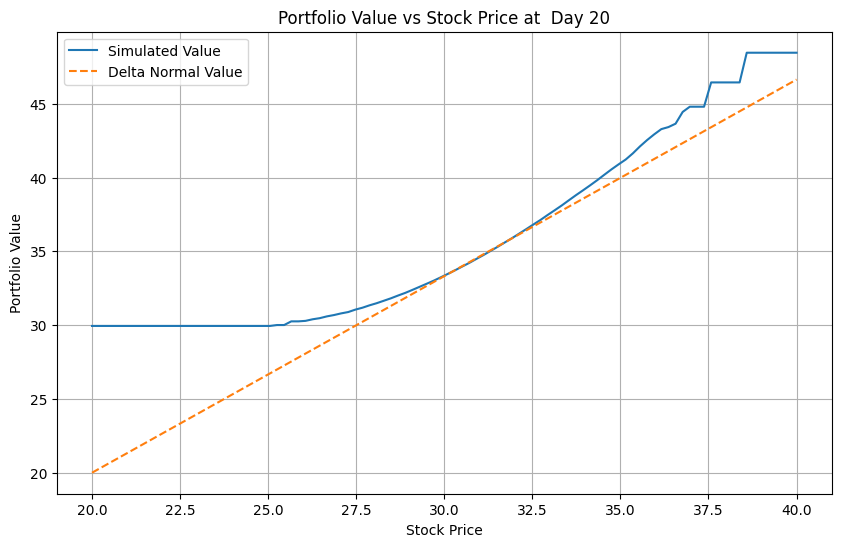

In [47]:
import matplotlib.pyplot as plt

def plot_vs(holding_day):
    stock_range = np.linspace(20, 40, 100)
    portfolio_values = []

    for stock_price in stock_range:
        closest_index = np.abs(stock_prices[:, holding_day] - stock_price).argmin()
        portfolio_values.append(portfolio_value[closest_index, -1])


    delta_normal_values = [delta_normal_value(stock_price,holding_day) for stock_price in stock_range]

    plt.figure(figsize=(10, 6))
    plt.plot(stock_range, portfolio_values, label='Simulated Value')
    plt.plot(stock_range, delta_normal_values, label='Delta Normal Value', linestyle='--')
    plt.xlabel('Stock Price')
    plt.ylabel('Portfolio Value')
    plt.title(f'Portfolio Value vs Stock Price at  Day {holding_day + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_vs(19)